In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
X = df.drop(columns=["AQI", "AQI_Bucket", "Date"])
y = df["AQI"].astype(float)


In [ ]:
n = len(X)
cut = int(n*0.8)
X_train, X_test = X.iloc[:cut], X.iloc[cut:]
y_train, y_test = y.iloc[:cut], y.iloc[cut:]
print("Train:", X_train.shape, "Test:", X_test.shape)


Train: (22280, 17) Test: (5571, 17)


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Identify categorical & numeric columns
categorical_cols = ["City"]
numeric_cols = [col for col in X.columns if col not in categorical_cols]

# Preprocessing
numeric_transformer = SimpleImputer(strategy="mean")
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_cols),
        ("cat", categorical_transformer, categorical_cols)
    ]
)

# Create pipeline with Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

lr_pipeline = Pipeline(steps=[("preprocessor", preprocessor),
                              ("model", LinearRegression())])

# Train
lr_pipeline.fit(X_train, y_train)

# Predict
y_pred = lr_pipeline.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Results:")
print("RMSE:", rmse)
print("R² Score:", r2)


Linear Regression Results:
RMSE: 53.63199292082744
R² Score: 0.7410443810766707


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_pipeline = Pipeline(steps=[("preprocessor", preprocessor),
                              ("model", RandomForestRegressor(n_estimators=100, random_state=42))])

# Train
rf_pipeline.fit(X_train, y_train)

# Predict
y_pred_rf = rf_pipeline.predict(X_test)

# Evaluate
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Results:")
print("RMSE:", rmse_rf)
print("R² Score:", r2_rf)


Random Forest Results:
RMSE: 44.81061455633222
R² Score: 0.819224626056686


In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt_pipeline = Pipeline(steps=[("preprocessor", preprocessor),
                              ("model", DecisionTreeRegressor(random_state=42))])

dt_pipeline.fit(X_train, y_train)
y_pred_dt = dt_pipeline.predict(X_test)

mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("Decision Tree Results:")
print("RMSE:", rmse_dt)
print("R² Score:", r2_dt)


Decision Tree Results:
RMSE: 68.99942377341021
R² Score: 0.5713839830709516


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_pipeline = Pipeline(steps=[("preprocessor", preprocessor),
                              ("model", RandomForestRegressor(n_estimators=100, random_state=42))])
rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)

print("\nRandom Forest Results:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R² Score:", r2_score(y_test, y_pred_rf))



Random Forest Results:
RMSE: 44.81061455633222
R² Score: 0.819224626056686


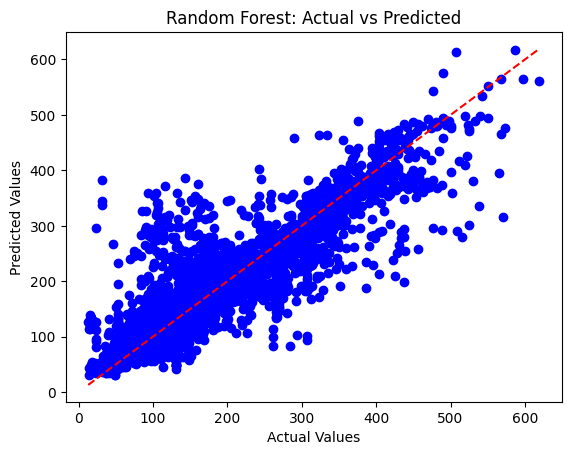

In [ ]:
import matplotlib.pyplot as plt

# y_test = actual values
# y_pred_rf = predicted values from Random Forest

plt.scatter(y_test, y_pred_rf, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest: Actual vs Predicted')
plt.show()
